In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [31]:
def KL(p , q):
    result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
    return result

In [32]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

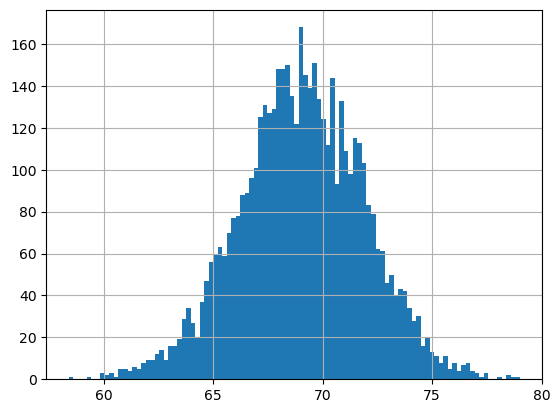

In [34]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [35]:
males.describe()['mean']

69.02634590621741

In [36]:
males.describe()['std']

2.863362228660651

In [37]:
count , devision = np.histogram(males , bins = 100)
print(f'{count} \n {devision}')

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1] 
 [58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.2909

In [38]:
ideal = stats.norm.rvs(size = len(males) , loc = males.describe()['mean'] , scale = males.describe()['std'])
ideal

array([70.86703195, 70.88563793, 66.52984564, ..., 66.17557329,
       67.7617783 , 69.50846741])

In [39]:
icount , idevision = np.histogram(ideal , bins=100)
print(f'{icount} \n {idevision}')

[  1   0   0   0   0   0   0   0   0   1   1   2   0   0   4   2   2   5
   6  10   8  22  13  17  25  19  24  22  37  24  42  55  46  78  69  84
  61  83  90  94 108 123 123 148 140 134 146 153 143 154 149 158 136 146
 152 152 133 137 116 123 113 126 108 115  92  94  62  69  67  63  58  29
  41  38  34  28  21  22  18  12  11  11  10  11   6   6   6   3   0   1
   0   0   1   1   0   0   0   1   0   1] 
 [57.89247742 58.11086741 58.3292574  58.54764739 58.76603739 58.98442738
 59.20281737 59.42120736 59.63959735 59.85798734 60.07637733 60.29476733
 60.51315732 60.73154731 60.9499373  61.16832729 61.38671728 61.60510727
 61.82349727 62.04188726 62.26027725 62.47866724 62.69705723 62.91544722
 63.13383721 63.35222721 63.5706172  63.78900719 64.00739718 64.22578717
 64.44417716 64.66256716 64.88095715 65.09934714 65.31773713 65.53612712
 65.75451711 65.9729071  66.1912971  66.40968709 66.62807708 66.84646707
 67.06485706 67.28324705 67.50163704 67.72002704 67.93841703 68.15680702
 68.375

In [40]:
KL(count , icount)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))


64.33036984237569

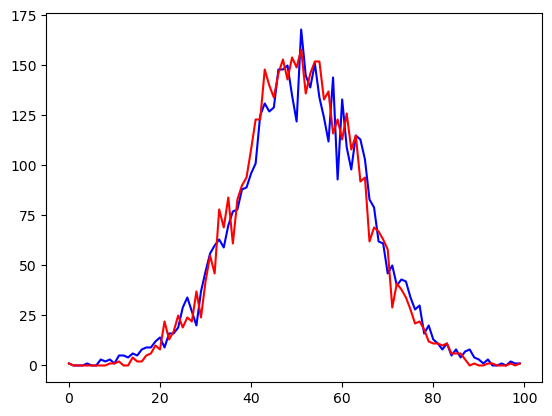

In [41]:
plt.plot(count, c='blue')
plt.plot(icount , c='red')

In [42]:
count = count / sum(count)
icount = icount/ sum(icount)
KL(count , icount)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5364\1497566379.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0 , q != 0), p * np.log(p/q) ,0))


0.012866073968475151